In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
# Import the time library and the datetime module from the datetime library 
import time
from datetime import datetime

In [2]:
# Create a set of random latitude and longitude combinations.
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)
lat_lngs

In [3]:
# Add the latitudes and longitudes to a list.
coordinates = list(lat_lngs)

In [4]:
from citipy import citipy
# Import the requests library.
import requests

# Import the API key.
from config import weather_api_key

# Starting URL for Weather Map API Call.
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + weather_api_key

In [5]:
# Create a list for holding the cities.
cities = []
# Identify the nearest city for each latitude and longitude combination.
for coordinate in coordinates:
    city = citipy.nearest_city(coordinate[0], coordinate[1]).city_name

    # If the city is unique, then we will add it to the cities list.
    if city not in cities:
        cities.append(city)
# Print the city count to confirm sufficient count.
len(cities)

606

In [6]:
# Create an empty list to hold the weather data.
city_data = []
# Print the beginning of the logging.
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters.
record_count = 1
set_count = 1

# Loop through all the cities in our list.
for i in range(len(cities)):

    # Group cities in sets of 50 for logging purposes.
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 1
        time.sleep(60)

    # Create endpoint URL with each city.
    city_url = url + "&q=" + cities[i]
    
# Loop through all the cities in the list.
for i, city in enumerate(cities):

    # Group cities in sets of 50 for logging purposes.
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 1
        time.sleep(60)

    # Create endpoint URL with each city.
    city_url = url + "&q=" + city.replace(" ","+")

    # Log the URL, record, and set numbers and the city.
    print(f"Processing Record {record_count} of Set {set_count} | {city}")
    # Add 1 to the record count.
    record_count += 1
    
# Run an API request for each of the cities.
    try:
        # Parse the JSON and retrieve data.
        city_weather = requests.get(city_url).json()
        # Parse out the needed data.
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        # Convert the date to ISO standard.
        city_date = datetime.utcfromtimestamp(city_weather["dt"]).strftime('%Y-%m-%d %H:%M:%S')
        # Append the city information into city_data list.
        city_data.append({"City": city.title(),
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

# If an error is experienced, skip the city.
    except:
        print("City not found. Skipping...")
        pass

# Indicate that Data Loading is complete.
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 13 | rikitea
Processing Record 2 of Set 13 | havoysund
Processing Record 3 of Set 13 | airai
Processing Record 4 of Set 13 | saint george
Processing Record 5 of Set 13 | verkhnevilyuysk
Processing Record 6 of Set 13 | kruisfontein
Processing Record 7 of Set 13 | new norfolk
Processing Record 8 of Set 13 | yellowknife
Processing Record 9 of Set 13 | thompson
Processing Record 10 of Set 13 | coihaique
Processing Record 11 of Set 13 | waki
Processing Record 12 of Set 13 | hithadhoo
Processing Record 13 of Set 13 | punta arenas
Processing Record 14 of Set 13 | albany
Processing Record 15 of Set 13 | tiksi
Processing Record 16 of Set 13 | cabo san lucas
Processing Record 17 of Set 13 | tuktoyaktuk
Processing Record 18 of Set 13 | hermanus
Processing Record 19 of Set 13 | khash
Processing Record 20 of Set 13 | dikson
Processing Record 21 of Set 13 | kavieng
Processing Record 22 of Set 13 | atuona
Processin

Processing Record 33 of Set 16 | hamilton
Processing Record 34 of Set 16 | cawayan
Processing Record 35 of Set 16 | lagoa
Processing Record 36 of Set 16 | nikolayevsk-na-amure
Processing Record 37 of Set 16 | tumannyy
City not found. Skipping...
Processing Record 38 of Set 16 | batemans bay
Processing Record 39 of Set 16 | sentyabrskiy
City not found. Skipping...
Processing Record 40 of Set 16 | dunedin
Processing Record 41 of Set 16 | fukue
Processing Record 42 of Set 16 | mar del plata
Processing Record 43 of Set 16 | kodiak
Processing Record 44 of Set 16 | klaksvik
Processing Record 45 of Set 16 | berezovyy
Processing Record 46 of Set 16 | montague
Processing Record 47 of Set 16 | fort nelson
Processing Record 48 of Set 16 | oranjestad
Processing Record 49 of Set 16 | bereda
Processing Record 50 of Set 16 | karamea
City not found. Skipping...
Processing Record 1 of Set 17 | svetlaya
Processing Record 2 of Set 17 | waipawa
Processing Record 3 of Set 17 | suntar
Processing Record 4 of

Processing Record 15 of Set 20 | sunland park
Processing Record 16 of Set 20 | balabac
Processing Record 17 of Set 20 | balkhash
Processing Record 18 of Set 20 | maldonado
Processing Record 19 of Set 20 | talcahuano
Processing Record 20 of Set 20 | erzin
Processing Record 21 of Set 20 | quirinopolis
Processing Record 22 of Set 20 | la seyne-sur-mer
Processing Record 23 of Set 20 | dargaville
Processing Record 24 of Set 20 | atar
Processing Record 25 of Set 20 | iralaya
Processing Record 26 of Set 20 | davenport
Processing Record 27 of Set 20 | valkeala
Processing Record 28 of Set 20 | fortuna
Processing Record 29 of Set 20 | broken hill
Processing Record 30 of Set 20 | clinton
Processing Record 31 of Set 20 | neiafu
Processing Record 32 of Set 20 | petropavlovsk-kamchatskiy
Processing Record 33 of Set 20 | bonthe
Processing Record 34 of Set 20 | zakharo
City not found. Skipping...
Processing Record 35 of Set 20 | wenling
Processing Record 36 of Set 20 | bayanday
Processing Record 37 of

Processing Record 4 of Set 24 | wasilla
Processing Record 5 of Set 24 | ayagoz
Processing Record 6 of Set 24 | sao joao da barra
Processing Record 7 of Set 24 | pareora
Processing Record 8 of Set 24 | sisimiut
Processing Record 9 of Set 24 | ekibastuz
Processing Record 10 of Set 24 | hobyo
Processing Record 11 of Set 24 | riyadh
Processing Record 12 of Set 24 | tabriz
Processing Record 13 of Set 24 | polovinnoye
Processing Record 14 of Set 24 | chapais
Processing Record 15 of Set 24 | ganzhou
Processing Record 16 of Set 24 | salinopolis
Processing Record 17 of Set 24 | kangaatsiaq
Processing Record 18 of Set 24 | ouargaye
Processing Record 19 of Set 24 | sakakah
Processing Record 20 of Set 24 | morwell
Processing Record 21 of Set 24 | mahon
Processing Record 22 of Set 24 | tabarqah
City not found. Skipping...
Processing Record 23 of Set 24 | lukoyanov
Processing Record 24 of Set 24 | la ligua
Processing Record 25 of Set 24 | oranjemund
Processing Record 26 of Set 24 | lashio
Processing

In [8]:
len(city_data)

559

In [9]:
# Convert the array of dictionaries to a Pandas DataFrame.
city_data_df = pd.DataFrame(city_data)
city_data_df.head(10)

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Rikitea,-23.1203,-134.9692,77.13,71,33,18.75,PF,2022-05-16 01:31:29
1,Havoysund,70.9963,24.6622,39.43,99,100,16.93,NO,2022-05-16 01:30:58
2,Airai,-8.9266,125.4092,73.69,55,1,2.33,TL,2022-05-16 01:31:29
3,Saint George,37.1041,-113.5841,93.79,4,0,18.41,US,2022-05-16 01:29:15
4,Verkhnevilyuysk,63.4453,120.3167,43.52,36,100,9.64,RU,2022-05-16 01:31:30
5,Kruisfontein,-34.0033,24.7314,55.06,65,0,6.40,ZA,2022-05-16 01:31:31
6,New Norfolk,-42.7826,147.0587,51.93,75,44,4.00,AU,2022-05-16 01:31:31
7,Yellowknife,62.4560,-114.3525,52.32,40,75,8.05,CA,2022-05-16 01:31:32
8,Thompson,55.7435,-97.8558,35.76,93,100,10.36,CA,2022-05-16 01:26:40
9,Coihaique,-45.5752,-72.0662,36.21,100,0,0.00,CL,2022-05-16 01:31:32


In [15]:
new_column_order = ["City","Country","Date","Lat","Lng","Max Temp","Humidity","Cloudiness","Wind Speed"]
city_data_df = city_data_df[new_column_order]

In [16]:
city_data_df.head(10)

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Rikitea,PF,2022-05-16 01:31:29,-23.1203,-134.9692,77.13,71,33,18.75
1,Havoysund,NO,2022-05-16 01:30:58,70.9963,24.6622,39.43,99,100,16.93
2,Airai,TL,2022-05-16 01:31:29,-8.9266,125.4092,73.69,55,1,2.33
3,Saint George,US,2022-05-16 01:29:15,37.1041,-113.5841,93.79,4,0,18.41
4,Verkhnevilyuysk,RU,2022-05-16 01:31:30,63.4453,120.3167,43.52,36,100,9.64
5,Kruisfontein,ZA,2022-05-16 01:31:31,-34.0033,24.7314,55.06,65,0,6.40
6,New Norfolk,AU,2022-05-16 01:31:31,-42.7826,147.0587,51.93,75,44,4.00
7,Yellowknife,CA,2022-05-16 01:31:32,62.4560,-114.3525,52.32,40,75,8.05
8,Thompson,CA,2022-05-16 01:26:40,55.7435,-97.8558,35.76,93,100,10.36
9,Coihaique,CL,2022-05-16 01:31:32,-45.5752,-72.0662,36.21,100,0,0.00


In [18]:
# Create the output file (CSV).
output_data_file = "weather_data/cities.csv"
# Export the City_Data into a CSV.
city_data_df.to_csv(output_data_file, index_label="City_ID")

In [19]:
# Extract relevant fields from the DataFrame for plotting.
lats = city_data_df["Lat"]
max_temps = city_data_df["Max Temp"]
humidity = city_data_df["Humidity"]
cloudiness = city_data_df["Cloudiness"]
wind_speed = city_data_df["Wind Speed"]

In [20]:
# Import the time module.
import time
# Get today's date in seconds.
today = time.time()
today

1652666267.0803678

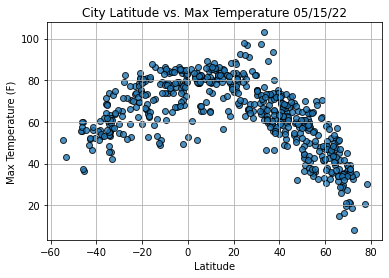

In [21]:
# Import time module
import time

# Build the scatter plot for latitude vs. max temperature.
plt.scatter(lats,
            max_temps,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Max Temperature "+ time.strftime("%x"))
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig1.png")

# Show plot.
plt.show()